**Author**: Moch Nabil Farras Dhiya (10120034)

**E-mail**: nabilfarras923@gmail.com

-------------------

**Disclaimer**: The **dataset** used in this analysis is a public dataset retrieved from [Customer Personality Analysis - Kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount).

# Background

## Attributes

**People**

*   ID: Customer's unique identifier
*   Year_Birth: Customer's birth year
*   Education: Customer's education level
*   Marital_Status: Customer's marital status
*   Income: Customer's yearly household income
*   Kidhome: Number of children in customer's household
*   Teenhome: Number of teenagers in customer's household
*   Dt_Customer: Date of customer's enrollment with the company
*   Recency: Number of days since customer's last purchase
*   Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

*   MntWines: Amount spent on wine in last 2 years
*   MntFruits: Amount spent on fruits in last 2 years
*   MntMeatProducts: Amount spent on meat in last 2 years
*   MntFishProducts: Amount spent on fish in last 2 years
*   MntSweetProducts: Amount spent on sweets in last 2 years
*   MntGoldProds: Amount spent on gold in last 2 years

**Promotion**


*   NumDealsPurchases: Number of purchases made with a discount
*   AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
*   AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
*   AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
*   AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
*   AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
*   Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

*   NumWebPurchases: Number of purchases made through the company’s website
*   NumCatalogPurchases: Number of purchases made using a catalogue
*   NumWebVisitsMonth: Number of visits to company’s website in the last month
*   NumStorePurchases: Number of purchases made directly in stores

## Goals

Perform clustering to summarize customer segments.

# Connect to Google Drive

In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:
# %cd /content/gdrive/My Drive/Portfolio/Data Science/Python/Customer Segmentation/CSV

# Import Packages

In [3]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from statistics import mean
from scipy.stats import skew

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering

from yellowbrick.cluster import KElbowVisualizer
from collections import defaultdict

# Import Data

In [4]:
data = pd.read_csv("../Data/final_data.csv")

In [5]:
data

,Unnamed: 0,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Duration_Customer,Frequency,...,Store,Web_visit,Campaign 1,Campaign 2,Campaign 3,Campaign 4,Campaign 5,Complain,Response,Income_Class
0,0,5524,66,1,0,58138.0,0,0,3850,32,...,4,7,0,0,0,0,0,0,1,2
1,1,2174,69,1,0,46344.0,1,1,3300,11,...,2,5,0,0,0,0,0,0,0,1
2,2,4141,58,1,1,71613.0,0,0,3499,25,...,10,4,0,0,0,0,0,0,0,3
3,3,6182,39,1,1,26646.0,1,0,3326,14,...,4,6,0,0,0,0,0,0,0,0
4,4,5324,42,3,1,58293.0,1,0,3348,24,...,6,5,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,2235,10870,56,1,1,61223.0,0,1,3568,23,...,4,5,0,0,0,0,0,0,0,2
2208,2236,4001,77,3,1,64014.0,2,1,3206,29,...,5,7,1,0,0,0,0,0,0,2
2209,2237,7270,42,1,0,56981.0,0,0,3342,25,...,13,6,0,0,0,1,0,0,0,2
2210,2238,8235,67,2,1,69245.0,0,1,3343,26,...,10,3,0,0,0,0,0,0,0,3


# Other Features

In [123]:
data['Wines_Cluster'] = data_wines['Cluster']
data['Fruits_Cluster'] = data_fruits['Cluster']
data['Meat_Cluster'] = data_meat['Cluster']
data['Fish_Cluster'] = data_fish['Cluster']
data['Sweets_Cluster'] = data_sweets['Cluster']
data['Gold_Cluster'] = data_gold['Cluster']

Wines best cluster: 2, 3

Fruits best cluster: 0

Meat best cluster: 0

Fish best cluster: 2

Wines best cluster: 2

Wines best cluster: 0

## Discount

### Wines

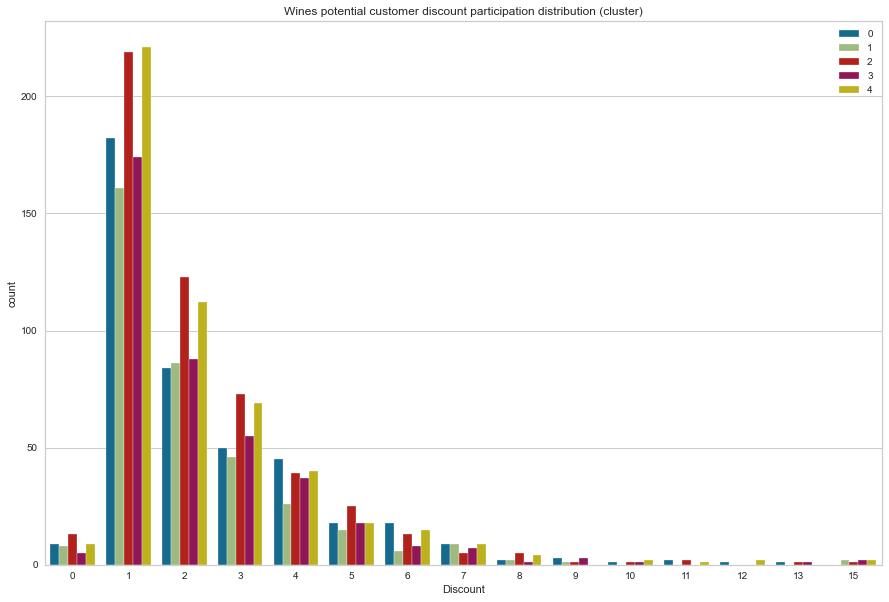

In [124]:
plt.figure(figsize = (15, 10))

sns.countplot(data = data, x = 'Discount', hue = 'Wines_Cluster')
plt.title('Wines potential customer discount participation distribution (cluster)')
plt.legend(loc = 'upper right')

### Fruits

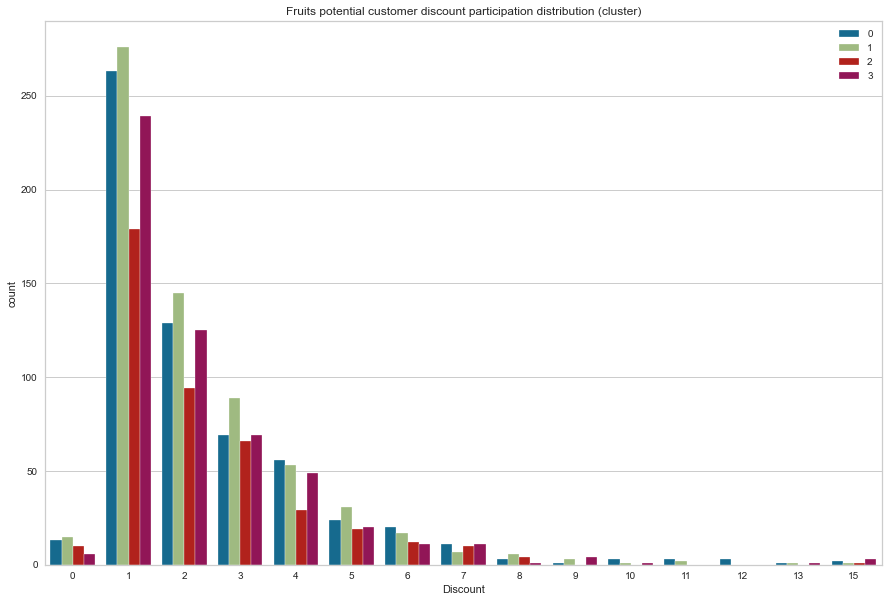

In [125]:
plt.figure(figsize = (15, 10))

sns.countplot(data = data, x = 'Discount', hue = 'Fruits_Cluster')
plt.title('Fruits potential customer discount participation distribution (cluster)')
plt.legend(loc = 'upper right')

### Meat

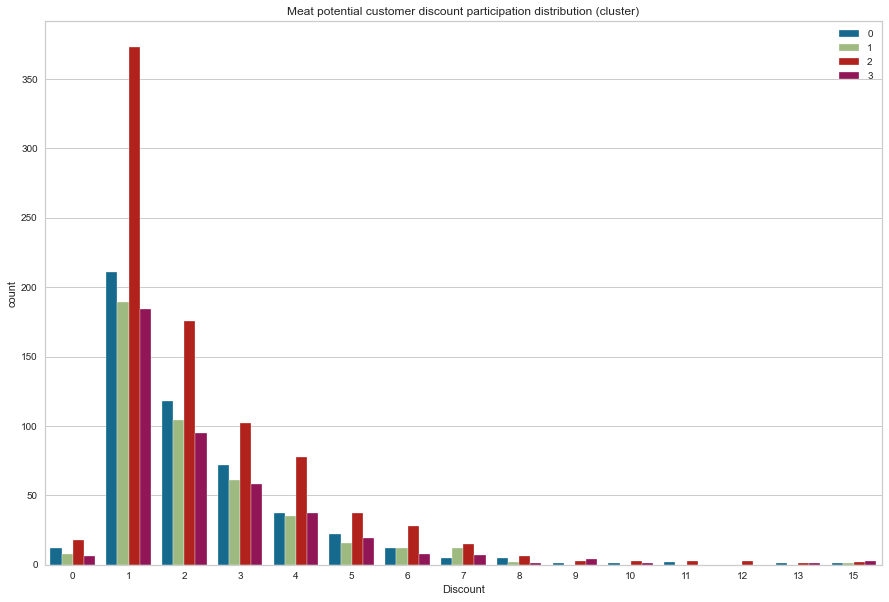

In [126]:
plt.figure(figsize = (15, 10))

sns.countplot(data = data, x = 'Discount', hue = 'Meat_Cluster')
plt.title('Meat potential customer discount participation distribution (cluster)')
plt.legend(loc = 'upper right')

### Fish

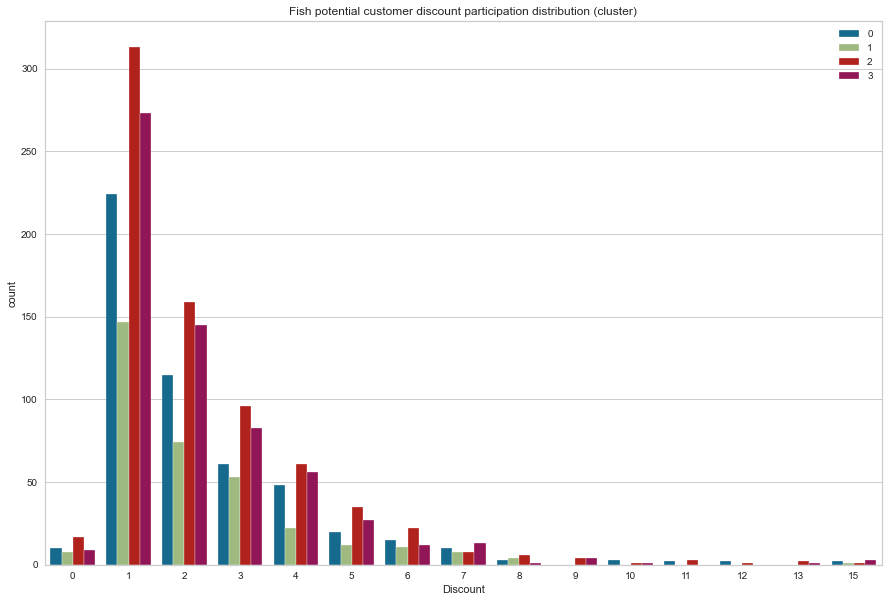

In [127]:
plt.figure(figsize = (15, 10))

sns.countplot(data = data, x = 'Discount', hue = 'Fish_Cluster')
plt.title('Fish potential customer discount participation distribution (cluster)')
plt.legend(loc = 'upper right')

### Sweets

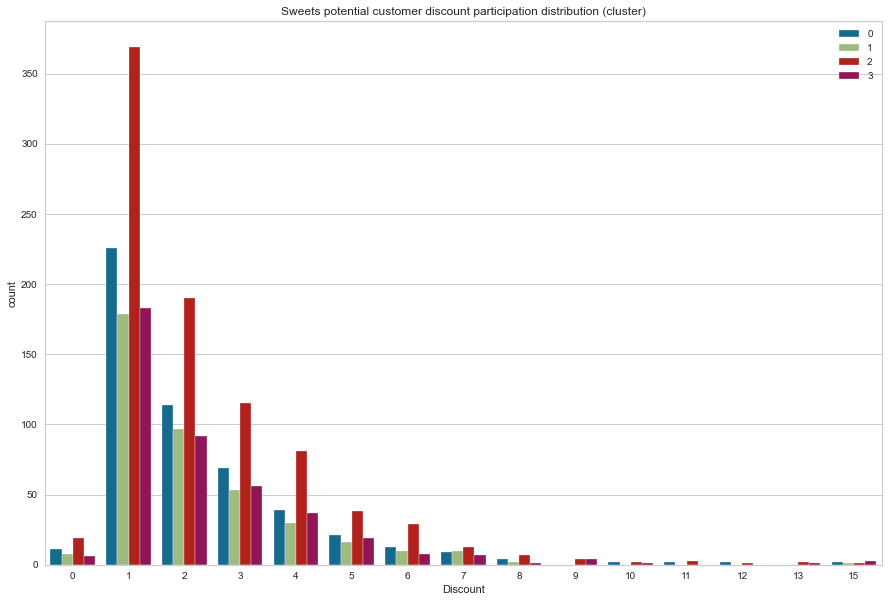

In [128]:
plt.figure(figsize = (15, 10))

sns.countplot(data = data, x = 'Discount', hue = 'Sweets_Cluster')
plt.title('Sweets potential customer discount participation distribution (cluster)')
plt.legend(loc = 'upper right')

### Gold

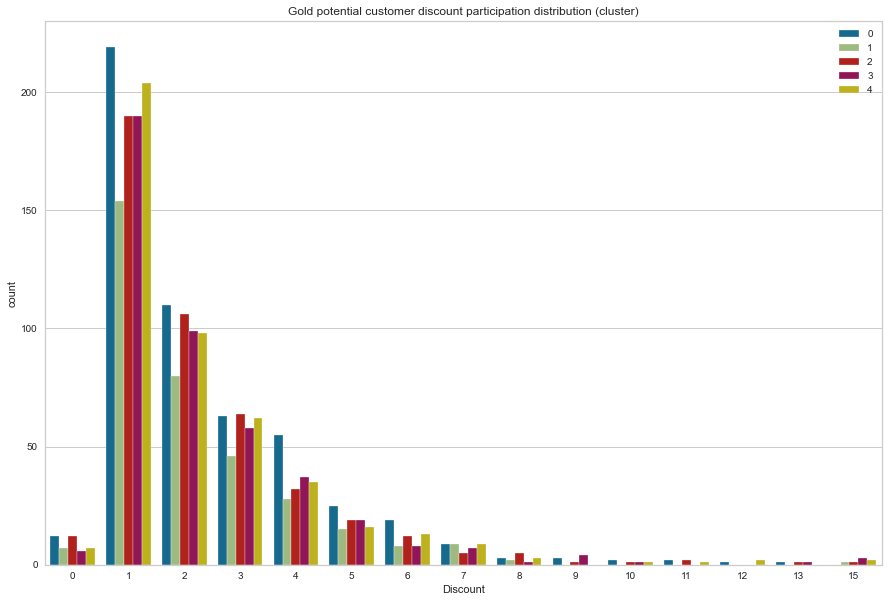

In [129]:
plt.figure(figsize = (15, 10))

sns.countplot(data = data, x = 'Discount', hue = 'Gold_Cluster')
plt.title('Gold potential customer discount participation distribution (cluster)')
plt.legend(loc = 'upper right')

## Media

We will see potential buyers' media preference on buying products by counting the percentage of customers who use certain media more than once.

### Wines

In [130]:
# Web

100 * len(data[(data['Wines_Cluster'] == 2) |
               (data['Wines_Cluster'] == 3) & 
               (data['Web'] > 1)]) / len(data[(data['Wines_Cluster'] == 2) | 
                                              (data['Wines_Cluster'] == 3)])

91.85667752442997

In [131]:
# Catalogue

100 * len(data[(data['Wines_Cluster'] == 2) | 
               (data['Wines_Cluster'] == 3) & 
               (data['Catalog'] > 1)]) / len(data[(data['Wines_Cluster'] == 2) | 
                                                  (data['Wines_Cluster'] == 3)])

77.85016286644951

In [132]:
# Store

100 * len(data[(data['Wines_Cluster'] == 2) | 
               (data['Wines_Cluster'] == 3) & 
               (data['Store'] > 1)]) / len(data[(data['Wines_Cluster'] == 2) | 
                                                (data['Wines_Cluster'] == 3)])

99.6742671009772

### Fruits

In [133]:
# Web

100 * len(data[(data['Fruits_Cluster'] == 0) & 
               (data['Web'] > 1)]) / len(data[(data['Fruits_Cluster'] == 0)])

81.53078202995009

In [134]:
# Catalogue

100 * len(data[(data['Fruits_Cluster'] == 0) &
               (data['Catalog'] > 1)]) / len(data[(data['Fruits_Cluster'] == 0)])

52.24625623960067

In [135]:
# Store

100 * len(data[(data['Fruits_Cluster'] == 0) & 
               (data['Store'] > 1)]) / len(data[(data['Fruits_Cluster'] == 0)])

99.00166389351081

### Meat

In [136]:
# Web

100*len(data[(data['Meat_Cluster'] == 0) & 
             (data['Web'] > 1)])/len(data[(data['Meat_Cluster'] == 0)])

82.0

In [137]:
# Catalogue

100 * len(data[(data['Meat_Cluster'] == 0) & 
               (data['Catalog'] > 1)]) / len(data[(data['Meat_Cluster'] == 0)])

51.6

In [138]:
# Store

100 * len(data[(data['Meat_Cluster'] == 0) & 
               (data['Store'] > 1)]) / len(data[(data['Meat_Cluster'] == 0)])

98.8

### Fish

In [139]:
# Web

100*len(data[(data['Fish_Cluster'] == 2) & 
             (data['Web'] > 1)]) / len(data[(data['Fish_Cluster'] == 2)])

82.57887517146776

In [140]:
# Catalogue

100 * len(data[(data['Fish_Cluster'] == 2) & 
               (data['Catalog'] > 1)]) / len(data[(data['Fish_Cluster'] == 2)])

51.851851851851855

In [141]:
# Store

100 * len(data[(data['Fish_Cluster'] == 2) & 
               (data['Store'] > 1)]) / len(data[(data['Fish_Cluster'] == 2)])

98.90260631001372

### Sweets

In [142]:
# Web

100 * len(data[(data['Sweets_Cluster'] == 2) & 
               (data['Web'] > 1)]) / len(data[(data['Sweets_Cluster'] == 2)])

82.37986270022883

In [143]:
# Catalogue

100 * len(data[(data['Sweets_Cluster'] == 2) & 
               (data['Catalog'] > 1)]) / len(data[(data['Sweets_Cluster'] == 2)])

51.83066361556064

In [144]:
# Store

100 * len(data[(data['Sweets_Cluster'] == 2) & 
               (data['Store'] > 1)]) / len(data[(data['Sweets_Cluster'] == 2)])

99.08466819221968

### Gold

In [145]:
# Web

100 * len(data[(data['Gold_Cluster'] == 0) & 
               (data['Web'] > 1)]) / len(data[(data['Gold_Cluster'] == 0)])

82.82442748091603

In [146]:
# Catalogue

100 * len(data[(data['Gold_Cluster'] == 0) & 
               (data['Catalog'] > 1)]) / len(data[(data['Gold_Cluster'] == 0)])

51.52671755725191

In [147]:
# Store

100 * len(data[(data['Gold_Cluster'] == 0) & 
               (data['Store'] > 1)]) / len(data[(data['Gold_Cluster'] == 0)])

99.23664122137404

## Campaign

In [148]:
data[['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']].value_counts()

Campaign 1  Campaign 2  Campaign 3  Campaign 4  Campaign 5
0           0           0           0           0             1754
                        1           0           0              129
                        0           1           0               83
                                    0           1               57
1           0           0           0           0               52
0           0           0           1           1               24
1           0           0           1           1               23
                                    0           1               21
                        1           0           1               13
                        0           1           0               12
                        1           0           0                8
            1           0           1           1                8
0           1           0           1           0                8
            0           1           0           1                6
   

In [149]:
len(data)

2212

### Wines

In [150]:
data[(data['Wines_Cluster'] == 2) | (data['Wines_Cluster'] == 3)][['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']].value_counts()

Campaign 1  Campaign 2  Campaign 3  Campaign 4  Campaign 5
0           0           0           0           0             731
                        1           0           0              53
                        0           1           0              38
                                    0           1              24
1           0           0           0           0              21
                                    1           1              10
0           0           0           1           1               9
1           0           0           0           1               6
                                    1           0               6
                        1           0           1               6
0           1           0           1           0               5
            0           1           0           1               3
            1           0           1           1               3
1           0           1           0           0               3
            1    

In [151]:
len(data[(data['Wines_Cluster'] == 2) | (data['Wines_Cluster'] == 3)])

921

### Fruits

In [152]:
data[(data['Fruits_Cluster'] == 0)][['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']].value_counts()

Campaign 1  Campaign 2  Campaign 3  Campaign 4  Campaign 5
0           0           0           0           0             462
                        1           0           0              40
                        0           1           0              29
                                    0           1              19
1           0           0           0           0              14
                                                1               7
0           0           0           1           1               6
1           0           0           1           1               6
                        1           0           1               5
                                                0               3
0           0           1           0           1               2
1           1           0           1           1               2
            0           0           1           0               2
0           1           1           0           0               1
                 

In [153]:
len(data[(data['Fruits_Cluster'] == 0)])

601

### Meat

In [154]:
data[(data['Meat_Cluster'] == 0)][['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']].value_counts()

Campaign 1  Campaign 2  Campaign 3  Campaign 4  Campaign 5
0           0           0           0           0             391
                        1           0           0              31
                        0           1           0              18
1           0           0           0           0              14
0           0           0           0           1              13
                                    1           1               5
1           0           1           0           1               5
                        0           0           1               4
                                    1           0               4
                                                1               4
0           1           0           1           0               3
                                                1               3
            0           1           0           1               2
1           0           1           0           0               1
            1    

In [155]:
len(data[(data['Meat_Cluster'] == 0)])

500

### Fish

In [156]:
data[(data['Fish_Cluster'] == 2)][['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']].value_counts()

Campaign 1  Campaign 2  Campaign 3  Campaign 4  Campaign 5
0           0           0           0           0             580
                        1           0           0              42
                        0           1           0              24
                                    0           1              20
1           0           0           0           0              19
                                                1               7
                                    1           1               6
0           0           0           1           1               6
1           0           1           0           1               6
                        0           1           0               5
0           1           0           1           0               4
                                                1               3
1           1           1           0           1               2
0           0           1           0           1               2
1           0    

In [157]:
len(data[(data['Fish_Cluster'] == 2)])

729

### Sweets

In [158]:
data[(data['Sweets_Cluster'] == 2)][['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']].value_counts()

Campaign 1  Campaign 2  Campaign 3  Campaign 4  Campaign 5
0           0           0           0           0             699
                        1           0           0              49
                        0           1           0              29
                                    0           1              23
1           0           0           0           0              22
                                    1           1               8
                                    0           1               8
0           0           0           1           1               7
1           0           1           0           1               7
                        0           1           0               6
0           1           0           1           0               4
            0           1           0           1               3
            1           0           1           1               3
1           1           1           0           1               2
            0    

In [159]:
len(data[(data['Sweets_Cluster'] == 2)])

874

### Gold

In [160]:
data[(data['Gold_Cluster'] == 0)][['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']].value_counts()

Campaign 1  Campaign 2  Campaign 3  Campaign 4  Campaign 5
0           0           0           0           0             420
                        1           0           0              26
                        0           1           0              22
                                    0           1              16
1           0           0           0           0              10
                                    1           1               7
                                    0           1               5
                        1           0           1               4
0           0           0           1           1               3
1           0           0           1           0               3
0           1           0           1           0               2
1           1           1           0           1               2
0           0           1           0           1               1
            1           1           0           0               1
                 

In [161]:
len(data[(data['Gold_Cluster'] == 0)])

524

# Summary & Recommendations

## Summary



1.   In general, the target customers for all products are mostly in their **early 40**s – **late 60**s who is at least an **Undergraduate**, has **high**-income, and **do not** have any child at home.
2.   The **most popular** platform for potential customers are **store**, **web**, and **catalogue**, respectively.
3.   Overall, the **discount participation rate** is **very low** (including the potential customers for each product'). Perhaps the discount given is **not tempting** for the customers?
4.   The potential buyers' campaign participation rate are also very low (most are not participating even once)



## Recommendations



1.   Further sales and marketing **strategies** should be **focused** towards **Undergraduates** with **high** income, and **do not** have any kid (and teens, if possible) at home.
2.   The company should **upgrade** their **website**, as many potential customers are buying products
through website, and also as a mean to attract another customer segments.
3.   There needs to be a **promo** to attract buyers, especially the potential customers, so the amount of sold products will increase. 
4.   There needs to be a **better campaign strategy** on catching the attention for these customers, as we previously known that these customers are at least an Undergraduate, so they might be busy with work and do not have time on participating in the Campaign.

